# Packaging

Let's look at the structure of creating an installable python package.

The python packaging system is constantly evolving, and the current recommendations
of tools is list here:

https://packaging.python.org/en/latest/guides/tool-recommendations/


##  Directory structure: 

We'll work on an example that builds on the Mandelbrot set exercise
from our matplotlib discussion.  Our example is hosted here:

https://github.com/wbandabarragan/computational-physics-2/tree/main/unit-2/mymodule

On your local computer, if you have `git` installed, you can clone this via:

```
git clone https://github.com/sbu-python-class/mymodule.git
```

The directory structure appears as:

```
mymodule
├── mymodule
│   ├── __init__.py
│   └── mandel.py
└── README.md
└── setup.py
```

This is a rather common way of structuring a project:

* The top-level `mymodule` directory is not part of the python
  package, but instead is where the source control (e.g. git) begins,
  and also hosts setup files that are used for installation.
  

* `mymodule/mymodule` is the actual python module that we will load.
   To make python recognize this as a module, we need an `__init__.py`
   file there -- it can be completely empty.
   

* The actual `*.py` files that make up our module are in `mymodule/mymodule`

Right now, this package does not appear in our python search path, so
the only way to load it is to work in the top-level `mymodule/`
directory:

```
cd mymodule
```

And then we can do:

```python
import mymodule.mandel
fig = mymodule.mandel.mandelbrot(256)
fig.savefig("test.png")
```

we could also do:

```python
from mymodule.mandel import mandelbrot
```

### Example: Mandelbrot fractal


See how to produce it here:

https://en.wikipedia.org/wiki/Mandelbrot_set



In [1]:
import mymodule.mymodule.mandel as md

/Users/wladimir/Dropbox/Yachay_Tech/Semestre4_2023/computational-physics-2/unit-2/new_modules/mymodule/mymodule/mandel.py:25: RuntimeWarning: overflow encountered in absolute
  m[np.logical_and(np.abs(z) > 2, m == 0)] = i


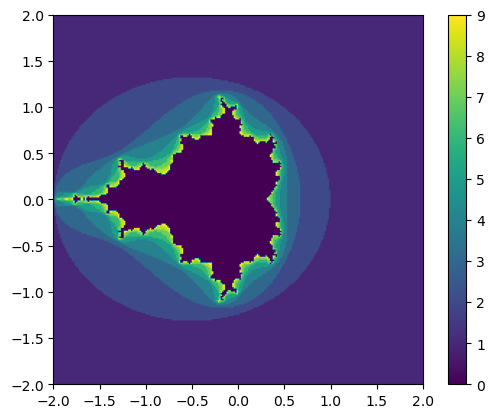

In [2]:
fig = md.mandelbrot(256)

fig.savefig("./new_modules/test-mandelbrot.png")

# Using the setuptools package

The current python package recommendation are:


### Installation:


  * `pip` to install packages from PyPI


  * `conda` for disctribution cross-platform software stacks


### Packaging tools:


  * `setuptools` to create source distributions


  * `build` for binary distributions


  * `twine` to upload to PyPI


We'll look at how to use `setuptools` to package our library.  See the
packaging guidelines here:
https://packaging.python.org/en/latest/guides/distributing-packages-using-setuptools/

The main thing we need to do is create a `setup.py` that describes our
package and its requirements:

Here's a first `setup.py`:

```python
from setuptools import setup, find_packages

setup(name='mymodule',
      description='test module',
      url='https://github.com/sbu-python-class/mymodule',
      author='your_name',
      author_email='your_email',
      license='BSD',
      packages=find_packages(),
      install_requires=['numpy', 'matplotlib'])
```

**Note:**

See the description of the BSD licence here:

https://en.wikipedia.org/wiki/Berkeley_Software_Distribution


# How to setup code?

We can setup in a variety of ways.  Two useful ways are:

## Install:

  `python setup.py install --user`

  This will copy the source files into your install location (likely
  `~/.local/...`) putting them into your python search path.  Then you
  can use this package from anywhere.
  

## Development mode:

See: https://setuptools.pypa.io/en/latest/userguide/development_mode.html

  `python setup.py develop --user`

  This doesn't actually install anything in your user- or site-wide
  install location, but instead it creates a special link in that
  install directory back to your actual project code.

  This allows you to continue to develop the package without needed to
  re-install each time you change the source.

  You can uninstall via:

  `python setup.py develop --uninstall`

The above put the package in the user-specific install location
(because of the `--user` flag).  If you leave this off, it will try to
install in the system-wide path, which might require admin privileges.


### Notes on symbolic links:

https://man7.org/linux/man-pages/man1/ln.1.html
